In [43]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/alikhangalymzhan/.kaggle: File exists


In [47]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [49]:
!kaggle datasets download -d asdasdasasdas/garbage-classification


Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
garbage-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
import zipfile

with zipfile.ZipFile("garbage-classification.zip", 'r') as zip_ref:
    zip_ref.extractall("garbage_classification")


In [53]:
import os

print("Top-level contents of 'garbage_classification':")
print(os.listdir("garbage_classification"))


Top-level contents of 'garbage_classification':
['one-indexed-files-notrash_test.txt', 'zero-indexed-files.txt', 'one-indexed-files-notrash_val.txt', 'Garbage classification', 'one-indexed-files-notrash_train.txt', 'one-indexed-files.txt']


In [55]:
nested_path = os.path.join("garbage_classification", "Garbage classification")
if os.path.exists(nested_path):
    print("\nSubfolders inside 'Garbage classification':")
    print(os.listdir(nested_path))



Subfolders inside 'Garbage classification':
['Garbage classification']


In [57]:
data_dir = 'garbage_classification/Garbage classification/Garbage classification'


In [296]:
import os
print(os.listdir(data_dir))  # Should print ['cardboard', 'glass', ..., 'trash']


['paper', '.DS_Store', 'metal', 'cardboard', 'trash', 'glass', 'plastic']


In [298]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [300]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load base model (without the top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(6, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)


In [302]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [304]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.4233 - loss: 1.5594 - val_accuracy: 0.6799 - val_loss: 0.8298
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7221 - loss: 0.7103 - val_accuracy: 0.6938 - val_loss: 0.7649
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7798 - loss: 0.5859 - val_accuracy: 0.7157 - val_loss: 0.7303
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8114 - loss: 0.5332 - val_accuracy: 0.7276 - val_loss: 0.6734
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.8198 - loss: 0.4954 - val_accuracy: 0.7197 - val_loss: 0.6938
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 968ms/step - accuracy: 0.8284 - loss: 0.4532 - val_accuracy: 0.7316 - val_loss: 0.6870
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 63s 976ms/step - accuracy: 0.8304 - loss: 0.4348 - val_accuracy: 0.7575 - val_loss: 0.6387
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 62s 973ms/step - accuracy: 0.8534 - loss: 0.3897 - val_accuracy: 0.7416 - 

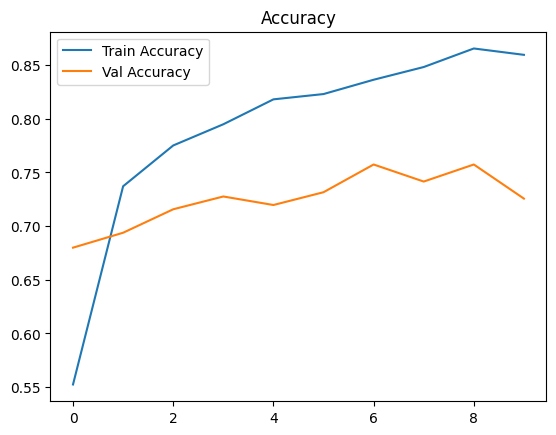

In [306]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [396]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img = image.load_img('/Users/alikhangalymzhan/Downloads/appletrash.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize


In [398]:
# Predict class
pred = model.predict(img_array)
predicted_class = np.argmax(pred)

# Map back to class name
class_labels = list(train_generator.class_indices.keys())
print("Predicted class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: trash


In [409]:
data_dir = 'garbage_classification/Garbage classification'

# Step 3: Confirm all 7 folders are present
print("Classes found:", os.listdir(data_dir))

Classes found: ['paper', 'non_garbage', '.DS_Store', 'metal', 'cardboard', 'trash', 'glass', 'plastic']


Found 2029 images belonging to 7 classes.
Found 504 images belonging to 7 classes.
Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 249ms/step - accuracy: 0.4818 - loss: 1.4049 - val_accuracy: 0.6448 - val_loss: 0.9302
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.7101 - loss: 0.7763 - val_accuracy: 0.7222 - val_loss: 0.7290
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 265ms/step - accuracy: 0.7819 - loss: 0.6178 - val_accuracy: 0.7123 - val_loss: 0.7218
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 272ms/step - accuracy: 0.8174 - loss: 0.5115 - val_accuracy: 0.7421 - val_loss: 0.6869
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.8216 - loss: 0.4648 - val_accuracy: 0.7460 - val_loss: 0.6971
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.8256 - loss: 0.4482 - val_accuracy: 0.7242 - val_loss: 0.6600
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 280ms/step - accuracy: 0.8454 - loss: 0.4282 - val_accuracy: 0.7560 - val_loss: 0.6588
Epoch 8/10
64/

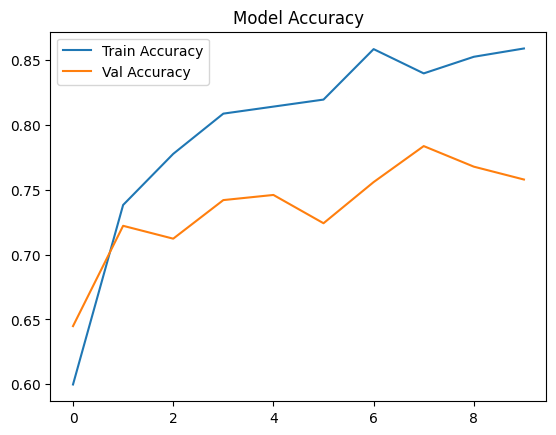

In [419]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Step 1: Set dataset directory
data_dir = 'garbage_classification/Garbage classification'

# Step 2: Remove any unwanted hidden files like .DS_Store
for item in os.listdir(data_dir):
    path = os.path.join(data_dir, item)
    if item.startswith('.') and os.path.isfile(path):
        os.remove(path)

# Step 3: Image data generator with augmentation
img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Step 4: Train & validation generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Step 5: Load MobileNetV2 and add custom classifier
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Step 6: Compile and train model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Step 7: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()



In [443]:
# Step 8: Predict on a new image
img_path = '/Users/alikhangalymzhan/Downloads/orangejuicecropeed.jpg'  # Replace with your test image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Map back to class name
class_labels = list(train_generator.class_indices.keys())
print("Predicted class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: non_garbage


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step


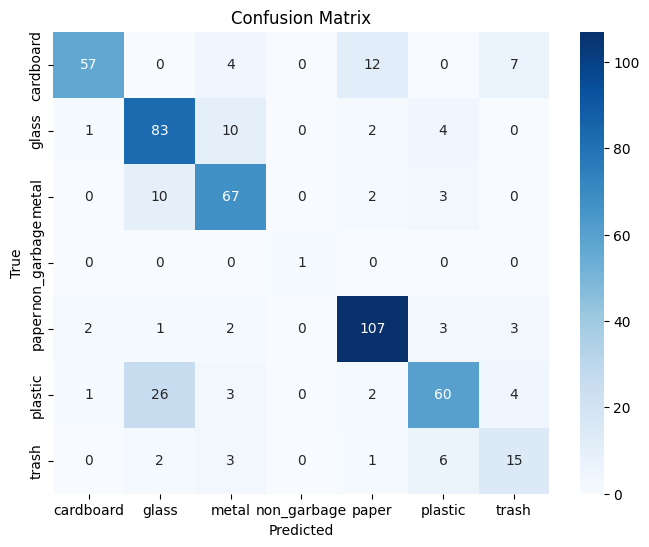


Classification Report:

              precision    recall  f1-score   support

   cardboard       0.93      0.71      0.81        80
       glass       0.68      0.83      0.75       100
       metal       0.75      0.82      0.78        82
 non_garbage       1.00      1.00      1.00         1
       paper       0.85      0.91      0.88       118
     plastic       0.79      0.62      0.70        96
       trash       0.52      0.56      0.54        27

    accuracy                           0.77       504
   macro avg       0.79      0.78      0.78       504
weighted avg       0.78      0.77      0.77       504



In [449]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Step 1: Get predictions on validation set
val_generator.reset()
pred_probs = model.predict(val_generator, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)

# Step 2: Get true labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Step 3: Compute confusion matrix
cm = confusion_matrix(true_classes, pred_classes)

# Step 4: Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Detailed classification report
print("\nClassification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))
